In [1]:
import pytorch_lightning as pl
from modules.lifter_2d_3d.model.linear_model.lit_linear_model import LitSimpleBaselineLinear
from modules.experiments.dataset import (
    construct_synthetic_cabin_ir, synthetic_cabin_ir_dataset_root_path
)
from modules.utils.convention import get_saved_model_path
from modules.experiments.experiment import Experiment

pl.seed_everything(1234)

viewpoint = 'A_Pillar_Codriver'
constructed_loader = construct_synthetic_cabin_ir(
    dataset_root_path=synthetic_cabin_ir_dataset_root_path,
    viewpoint=viewpoint
)
saved_model_path = get_saved_model_path(
    model_name='linear_model',
    trained_dataset_name='synthetic_cabin_ir',
    trained_datasubset_name='codriver_pillar_predicted_2d',
    # pretrained_dataset_name='synthetic_cabin_ir',
    # pretrained_datasubset_name='A_Pillar_Codriver',
)
experiment = Experiment(
    LitModel=LitSimpleBaselineLinear,
    constructed_loader=constructed_loader,
    saved_model_path=saved_model_path,
    model_parameters=dict(
        exclude_ankle=True,
        exclude_knee=True
    )
)

experiment.setup()
# experiment.lit_model.learning_rate = 1e-3
experiment.train()

Global seed set to 1234
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


train_dataset 37499 val_dataset 6250 test_dataset 6251
train_dataset 37499 val_dataset 6250 test_dataset 6251


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params
----------------------------------------
0 | model | BaselineModel | 4.3 M 
----------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.105    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 128 samples : 2423.638343811035
activity_macro_mpjpe None


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 2925 batches: 277.7899540183891
val MPJPE from: 6208 samples : 53.887829184532166
activity_macro_mpjpe None


Validation: 0it [00:00, ?it/s]

check #2
training loss from 2925 batches: 65.7444140340528
val MPJPE from: 6208 samples : 33.51936116814613
activity_macro_mpjpe None


Validation: 0it [00:00, ?it/s]

check #3
training loss from 2925 batches: 54.0747059843479
val MPJPE from: 6208 samples : 32.78566151857376
activity_macro_mpjpe None


Validation: 0it [00:00, ?it/s]

check #4
training loss from 2925 batches: 50.459444376393265
val MPJPE from: 6208 samples : 33.361729234457016
activity_macro_mpjpe None


Validation: 0it [00:00, ?it/s]

check #5
training loss from 2925 batches: 48.54350733833435
val MPJPE from: 6208 samples : 32.44515880942345
activity_macro_mpjpe None


Validation: 0it [00:00, ?it/s]

check #6
training loss from 2925 batches: 46.71939779550601
val MPJPE from: 6208 samples : 33.73579680919647
activity_macro_mpjpe None


Validation: 0it [00:00, ?it/s]

check #7
training loss from 2925 batches: 45.05468142083567
val MPJPE from: 6208 samples : 32.35899657011032
activity_macro_mpjpe None


Validation: 0it [00:00, ?it/s]

check #8
training loss from 2925 batches: 43.897432107955986
val MPJPE from: 6208 samples : 33.097315579652786
activity_macro_mpjpe None


Validation: 0it [00:00, ?it/s]

check #9
training loss from 2925 batches: 42.80789968677056
val MPJPE from: 6208 samples : 31.655430793762207
activity_macro_mpjpe None


Validation: 0it [00:00, ?it/s]

check #10
training loss from 2925 batches: 42.044075023160026
val MPJPE from: 6208 samples : 32.202497124671936
activity_macro_mpjpe None


Validation: 0it [00:00, ?it/s]

check #11
training loss from 2925 batches: 41.51636726708494
val MPJPE from: 6208 samples : 32.619185745716095
activity_macro_mpjpe None


In [2]:
experiment.test()

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir/codriver_pillar_predicted_2d/linear_model/lightning_logs/version_2/checkpoints/epoch=44-step=26325.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir/codriver_pillar_predicted_2d/linear_model/lightning_logs/version_2/checkpoints/epoch=44-step=26325.ckpt


Testing: 0it [00:00, ?it/s]

MPJPE: 36.022863915645026
PJPE
[{'nose': 23.0569768555577, 'left_eye': 23.126923969247997, 'right_eye': 22.301183859900174, 'left_ear': 22.796589670948347, 'right_ear': 17.95079347353298, 'left_shoulder': 9.66757561787016, 'right_shoulder': 9.632452366338212, 'left_elbow': 77.2047860350955, 'right_elbow': 83.24718584600595, 'left_wrist': 51.21257604031046, 'right_wrist': 50.516658113608116, 'left_hip': 39.71232868364972, 'right_hip': 37.87120037132013}]
activities_mpjpe:
{}
test mpjpe: 36.022863915645026
activity_macro_mpjpe None


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │    36.022863915645026     │
└───────────────────────────┴───────────────────────────┘

result
{'checkpoint_path': 'saved_lifter_2d_3d_model/linear_model/synthetic_cabin_ir/codriver_pillar_predicted_2d/linear_model/lightning_logs/version_2/checkpoints/epoch=44-step=26325.ckpt', 'mpjpe': 36.022863915645026, 'pjpe': [{'nose': 23.0569768555577, 'left_eye': 23.126923969247997, 'right_eye': 22.301183859900174, 'left_ear': 22.796589670948347, 'right_ear': 17.95079347353298, 'left_shoulder': 9.66757561787016, 'right_shoulder': 9.632452366338212, 'left_elbow': 77.2047860350955, 'right_elbow': 83.24718584600595, 'left_wrist': 51.21257604031046, 'right_wrist': 50.516658113608116, 'left_hip': 39.71232868364972, 'right_hip': 37.87120037132013}], 'activity_mpjpe': [], 'activity_macro_mpjpe': None}


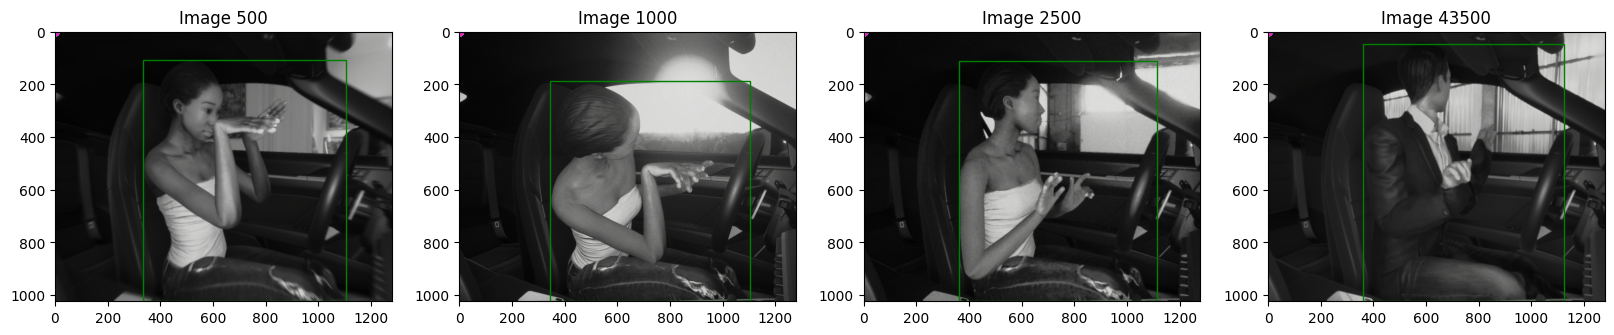

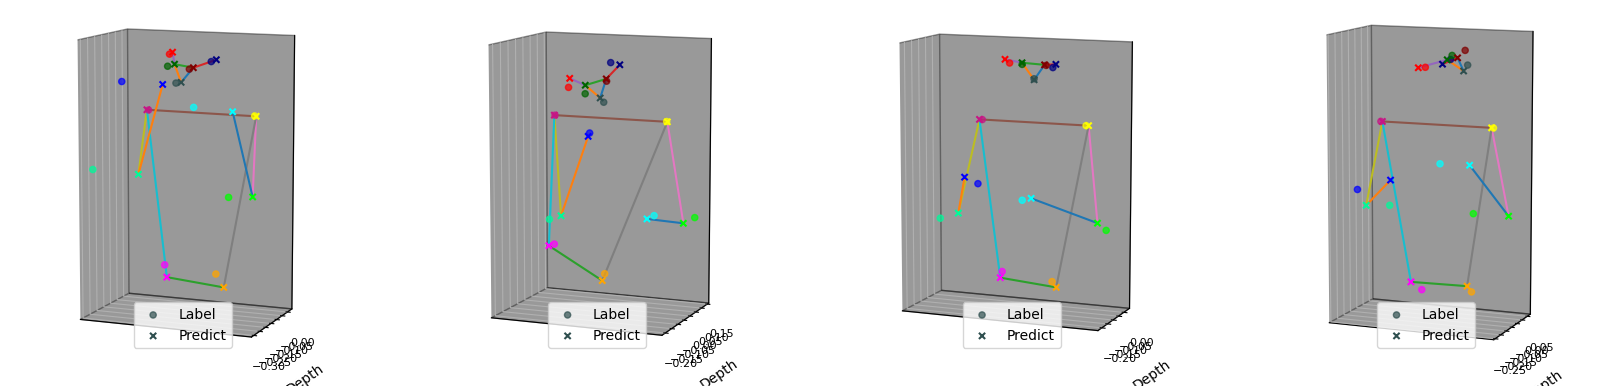

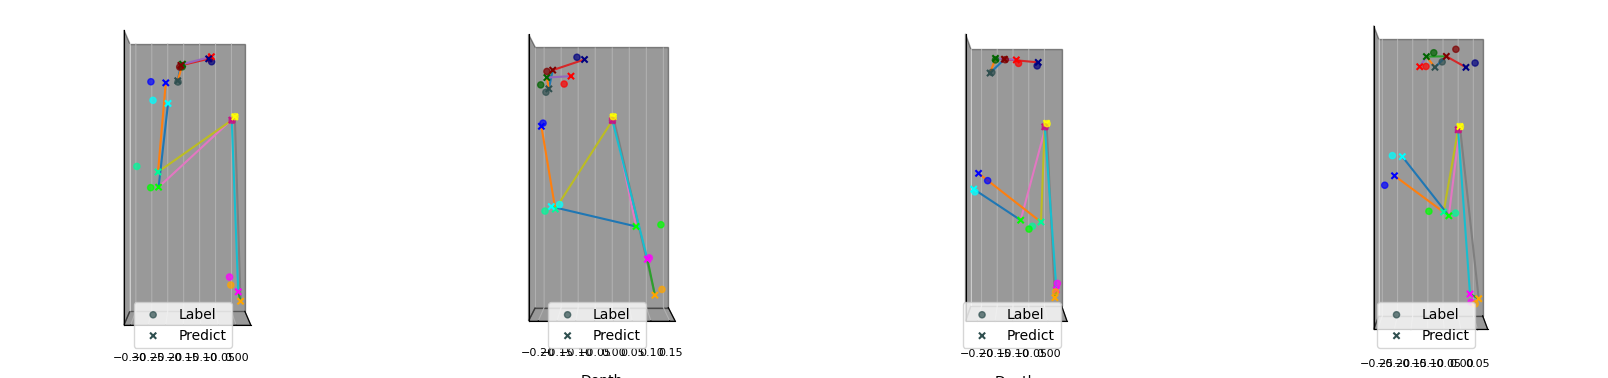

In [4]:
from modules.utils.visualization import (
    plot_samples
)
plot_samples(
    synthetic_cabin_ir_dataset_root_path / viewpoint,
    experiment.lit_model,
    experiment.test_loader,
    'test',
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_indices=[500, 1000, 2500, 6000],
    is_plot_gt_skeleton=False
)

In [ ]:
from modules.utils.visualization import (
    plot_samples
)
from pathlib import Path
plot_samples(
    Path(synthetic_cabin_ir_dataset_root_path)/ viewpoint,
    experiment.lit_model,
    experiment.test_loader,
    'train',
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_indices=[500, 1000, 2500, 6000],
    is_plot_gt_skeleton=False
)